In [1]:
import numpy as np
from keras.datasets import mnist
from keras.optimizers import Adam

Using TensorFlow backend.
C:\Users\yadav\Anaconda3\envs\ML\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\yadav\Anaconda3\envs\ML\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\yadav\Anaconda3\envs\ML\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\yadav\Anaconda3\envs\ML\lib\site-packages\tenso

In [2]:
np.random.seed(102)

In [3]:
noise_dim = 100
batch_size = 16
steps_per_epoch = 3750
epochs = 10

In [4]:
save_path = 'fcgan_images'

In [5]:
img_size, channels = 28,1

In [6]:
optimizer = Adam(0.0002, 0.5)

Instructions for updating:
Colocations handled automatically by placer.


In [7]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [8]:
from matplotlib import pyplot as plt

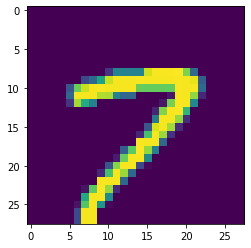

In [9]:
plt.imshow(X_train[123])

In [10]:
X_train = (X_train.astype('float32')-127.5)/127.5
X_test = (X_test.astype('float32')-127.5)/127.5

In [12]:
X_train[0]

array([[-1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        ],
       [-1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        ],
       [-1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.    

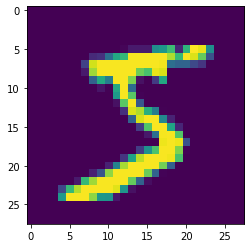

In [13]:
plt.imshow(X_train[0])

In [14]:
X_train = X_train.reshape(-1, img_size*img_size*channels)

In [16]:
X_train.shape

(60000, 784)

### Creating the generator

In [17]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers.advanced_activations import LeakyReLU

In [18]:
def create_generator():
    generator = Sequential()
    
    generator.add(Dense(256, input_dim=noise_dim))
    generator.add(LeakyReLU(0.2))
    
    generator.add(Dense(512))
    generator.add(LeakyReLU(0.2))
    
    generator.add(Dense(1024))
    generator.add(LeakyReLU(0.2))
    
    generator.add(Dense(img_size*img_size*channels, activation='tanh'))
    
    generator.compile(loss='binary_crossentropy', optimizer=optimizer)
    return generator

### Creating the discriminator 

In [22]:
def create_discriminator():
    discriminator = Sequential()
    
    discriminator.add(Dense(1024, input_dim=img_size*img_size*channels))
    discriminator.add(LeakyReLU(0.2))
    
    discriminator.add(Dense(512))
    discriminator.add(LeakyReLU(0.2))
    
    discriminator.add(Dense(256))
    discriminator.add(LeakyReLU(0.2))
    
    discriminator.add(Dense(1, activation='sigmoid'))
    
    discriminator.compile(loss='binary_crossentropy', optimizer=optimizer)
    
    return discriminator

In [23]:
discriminator = create_discriminator()
generator = create_generator()

In [24]:
generator.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 256)               25856     
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 256)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 512)               131584    
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 512)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 1024)              525312    
_________________________________________________________________
leaky_re_lu_6 (LeakyReLU)    (None, 1024)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 784)              

In [25]:
discriminator.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1024)              803840    
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               524800    
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               131328    
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 256)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                

In [26]:
from keras.models import Model
from keras.layers import Input

In [31]:
generator = create_generator()
discriminator = create_discriminator()

discriminator.trainable = False

gan_input = Input(shape=(noise_dim,))
fake_img = generator(gan_input)

gan_output = discriminator(fake_img)

gan = Model(gan_input, gan_output)
gan.compile(loss='binary_crossentropy', optimizer=optimizer)

In [32]:
gan.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 100)               0         
_________________________________________________________________
sequential_10 (Sequential)   (None, 784)               1486352   
_________________________________________________________________
sequential_11 (Sequential)   (None, 1)                 1460225   
Total params: 2,946,577
Trainable params: 1,486,352
Non-trainable params: 1,460,225
_________________________________________________________________
